In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import sklearn.datasets
import sklearn.linear_model

### 2.3.6 โมเดล DNN หลายชั้น

สัญกรณ์ที่ใช้สำหรับ DNN ชั้นแฝงเดี่ยวสามารถขยายไปยังโมเดล DNN ทั่วไปที่มีจำนวน $L$ ชั้นได้โดยง่าย รูปที่ 2.20 
แสดงตัวอย่าง DNN 4 ชั้น เมื่อนับเรียงจากชั้นแฝงแรก (จากซ้ายมาขวาไม่รวมชั้นอินพุต) มีจำนวนเซลล์เท่ากับ 4, 5, 3, 1 ตามลำดับ 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1f1jWQGyBomwpSgZYtnmf43IJSfAK1j3w" width=600 />
</p>
<div align="center">รูปที่ 2.20 ตัวอย่างของ DNN 4 ชั้น </div>

**หมายเหตุ :** ในการนับชั้นของ DNN ดัชนีที่ใช้ในหนังสือนี้จะกำหนดอินพุตเป็นชั้น 0 และเอาต์พุตเป็น $L$ 

แผนภาพการคำนวณสำหรับหนึ่งตัวอย่างข้อมูลของ DNN ทั่วไปที่มีจำนวนชั้นเท่ากับ $L$ เขียนได้ดังในรูปที่ 2.21 
โดยประกอบด้วยการแพร่กระจายข้างหน้าและย้อนหลังของแต่ละชั้นต่ออนุกรมกันตามทิศทางการไหล 
ส่วนลูกศรที่ชี้ลงด้านล่างแสดงการส่งค่าของตัวแปรที่ได้จากการคำนวณด้านหน้าไปยังการคำนวณย้อนหลังในชั้นเดียวกันผ่านแคช 
(cache) คือตัวแปรที่มิใช่อินพุตและเอาต์พุตหลักของการไหล แต่ต้องการใช้ในการคำนวณเท่านั้น

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1aA-Bueabo6US2z4FrX7a-nkHu87J--eK" width=800 />
</p>
<div align="center">รูปที่ 2.21 แผนภาพการคำนวณของ DNN $L$ ชั้นแฝง </div>

เมื่อเขียนเป็นการคำนวณเชิงเวกเตอร์ ข้อมูลอินพุตและเอาต์พุต จะอยู่ในรูปเมทริกซ์ 
<code>Al, Zl</code> สำหรับการไหลทางข้างหน้าจะเริ่มจากอินพุต $X$ที่นิยามเป็น $A^{[0]}$ 
เพื่อความสะดวกในการเขียนโค้ดวนรอบ ดังนั้นสำหรับชั้น $l$ ในทิศทางด้านหน้าจะคำนวณตามสมการดังนี้

$$
Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} \tag{2.41}
$$
$$
A^{[l]} = g^{[l]}(Z^{[l]}) \tag{2.42}
$$

สามารถเขียนเป็นคำสั่งไพธอนตามขั้นตอนวิธี 2.3 โดยตั้งชื่อตัวแปร <code>Zl, Wl, bl, Al, gl</code> 
แทน $Z^{[l]},\;W^{[l]},\;b^{[l]},\;A^{[l]},\;g^{[l]}$ ตามลำดับ โดยค่าของ <code>gl</code> 
คือเอาต์พุตของฟังก์ชันกระตุ้นของชั้น $l$ เช่น <code>g1 = ReLU(z1), gL = sigmoid(ZL)</code>

<code>
Z1 = W1@A0 + b1
A1 = g1
Z2 = W2@A1 + b2
A2 = g2
:
Zl = Wl@Al_1 + Bl
Al = gl
:
ZL = WL@AL_1 + BL
AL = gL
</code>

ขั้นตอนวิธี 2.3 การแพร่กระจายข้างหน้าสำหรับ DNN ที่มีจำนวนชั้น L

**หมายเหตุ :** ใช้ชื่อตัวแปร <code>Al_1, Zl_1, AL_1, ZL_1</code> 
แทน $A^{[l-1]},\;Z^{[l-1]},\;A^{[L-1]},\;Z^{[L-1]}$ ตามลำดับ    

สำหรับการแพร่กระจายย้อนหลัง การคำนวณสำหรับชั้น $l$ จะเป็นตามสมการดังนี้

$$
dZ^{[l]} = dA^{[l]}*g'(z^{[l]}) \tag{2.43}
$$
$$
dW^{[l]} = \frac{\partial \mathcal{L}}{\partial W^{[l]}} = \frac{1}{m}dZ^{[l]}A^{[l-1]T} \tag{2.44}
$$
$$
db^{[l]} = \frac{\partial \mathcal{L}}{\partial b^{[l]}} = \frac{1}{m}\sum_{i=1}^mdZ^{[l](i)} \tag{2.45}
$$
$$
dA^{[l-1]} = \frac{\partial \mathcal{L}}{\partial A^{[l-1]}} = W^{[l]T}dZ^{[l]} \tag{2.46}
$$

เขียนเป็นคำสั่งไพธอนได้ตามขั้นตอนวิธี 2.4 โดยตั้งชื่อตัวแปร 
<code>dZl = </code>$\frac{\partial J}{\partial Z^{[l]}}$, <code>dWl = </code>$\frac{\partial J}{\partial W^{[l]}}$
<code>dbl = </code>$\frac{\partial J}{\partial b^{[l]}}$, <code>gprimel = </code>$g'^{[l]}(Z^{[l]})$

```python
dZL = dAL*gprimeL
dWL = (1/m)*dZL@AL_1.T
dbL = (1/m)*np.sum(dZL, axis=1, keepdims=True)
dAL_1 = WL.T@dZL
:
dZl = dAl*gprimel 
dWl = (1/m)*dZl@Al_1.T
dbl = (1/m)*np.sum(dZl, axis=1, keepdims=True)
dAl_1 = Wl.T@dZl
:
dZ1 = dA1*gprime1
dW1 = (1/m)*dZ1@A0.T
db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
```

ขั้นตอนวิธี 2.4 การแพร่กระจายย้อนหลังสำหรับ DNN ที่มีจำนวนชั้น L

การแพร่กระจายย้อนหลังเริ่มจากชั้นของ DNN จากชั้นสุดท้าย $L$ ไปยังชั้นแรก (จากขวามาซ้าย) 
โดยแต่ละชั้นคำนวณค่าของ <code>dZl</code>ภายใน ใช้ค่าของ <code>Wl, Bl</code>จากแคช 
และได้เอาต์พุตคือ <code>dWl, dbl, dAl_1</code> 
ค่าของ <code>dWl, dbl</code> ที่คำนวณได้จะถูกนำไปปรับค่าของพารามิเตอร์ $Wl, Bl$ โดยขั้นการปรับกำหนดจากอัตราการเรียนรู้ 
<code>alpha</code>

```python
Wl := Wl - alpha*dWl
bl := bl - alpha*dbl
```

ส่วนค่าของ <code>dAl_1</code>ถูกส่งให้กับชั้นต่อไปทางด้านซ้าย จนกระทั่งถึงชั้นแรกค่าเอาต์พุต <code>dA0</code>
จะไม่ถูกใช้งาน

สังเกตว่าการแพร่กระจายย้อนหลังจะเริ่มต้นโดยค่า <code>dAL</code> ซึ่งจะไม่แสดงรายละเอียดทางคณิตศาสตร์ 
สามารถใช้แคลคูลัสในการแสดงว่า ในกรณีฟังก์ชันกระตุ้นซิกมอยด์ ค่าของ <code>daL</code> สำหรับข้อมูลตัวอย่าง $i$ เท่ากับ
$$
da^{[L](i)} = -\frac{y^{(i)}}{a^{(i)}} + \frac{1-y^{(i)}}{1-a^{(i)}} \tag{2.47}
$$

$$
dA^{[L]} = [da^{[L](1)},\;\ldots,\;da^{[L](m)}] = \left[-\frac{y^{(1)}}{a^{(1)}} + \frac{1-y^{(1)}}{1-a^{(1)}}\;,\; \ldots \;,\;  -\frac{y^{(m)}}{a^{(m)}} + \frac{1-y^{(m)}}{1-a^{(m)}}  \right] \tag{2.48}
$$

ซึ่งสามารถเขียนเป็นโค้ดไพธอนดังนี้

```python
dAL = - (np.divide(Y, AL) - np.divide(1-Y,1-AL))
```

สมมุติว่าต้องการสร้างโมเดลสำหรับ DNN 4 ชั้นในรูปที่ 2.20 เริ่มต้นจากการตั้งค่าเริ่มต้นโดยฟังก์ชัน 
<code>init_params_DNN()</code> ที่รับอาร์กิวเมนต์ <code>layer_dims</code> เป็นจำนวนเซลล์ในแต่ละชั้น 
ค่าสมาชิกของเมทริกซ์น้ำหนัก $W$ จะถูกตั้งเป็นค่าน้อยแบบสุ่มเพื่อมิให้เกิดปัญหาสมมาตร 
ส่วนสมาชิกค่าเวกเตอร์ $b$ สามารถกำหนดค่าเริ่มต้นเป็นศูนย์ ทั้งหมดถูกเก็บในดิกชันนารี <code>parameters</code> 
ที่จะถูกคืนค่าโดยฟังก์ชัน

In [2]:
def init_params_DNN(layer_dims):
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        # parameter initialization can affect performance significantly!
        # parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01 # this doesn't work well!
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

**หมายเหตุ :** พบว่าการปรับมาตราส่วนค่าเริ่มต้นของเมทริกซ์น้ำหนักมีผลต่อสมรรถนะของ DNN เดิมใช้วิธีการคูณโดยค่าน้อยเช่น 0.01 
แต่เมื่อนำไปใช้งานจริงในตัวอย่าง 2.4 ด้านล่างพบว่าไม่ได้ผลเป็นที่พอใจ

ดังนั้นสำหรับโมเดล DNN 4 ชั้นในรูปที่ 2.20 ใช้คำสั่งตั้งค่าดังนี้ 

In [3]:
parameters = init_params_DNN([3,4,5,3,1])

โดยสมาชิกแรกของเวกเตอร์ในอาร์กิวเมนต์คือขนาดอินพุต 
ตรวจสอบขนาดของเมทริกซ์ค่าน้ำหนักและเวกเตอร์ค่าเอนเอียงว่าถูกต้องหรือไม่ เช่นเมทริกซ์ <code>W2</code> 
ต้องมีขนาดเท่ากับ $5 \times 4$ ตามจำนวนอินพุตและเอาต์พุตของชั้นแฝง 2

In [4]:
parameters["W2"]

array([[ 0.41403899,  0.46835305,  0.35218281, -0.66779918],
       [ 0.41211411, -1.13297166, -0.02999784,  0.44290573],
       [ 0.10383919,  0.18352072, -0.27131071,  0.34490227],
       [-0.84673874, -0.21500886, -0.66093796, -0.25847408],
       [ 0.07039366,  0.7600231 , -0.14457698,  0.26294188]])

ก่อนจะสร้างแผนภาพการแพร่กระจายข้างหน้าและย้อนหลัง นิยามฟังก์ชันเสริมสำหรับฟังก์ชันกระตุ้นที่ใช้งานดังนี้

In [5]:
def sigmoid_fw(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu_fw(Z):
    A = np.maximum(0,Z)
    cache = Z
    return A, cache


def relu_bw(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_bw(dA, cache):
    Z = cache    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

บางฟังก์ชันได้นิยามไว้ก่อนหน้านี้ 
สิ่งที่เพิ่มเข้ามาคือเอาต์พุตแดชที่ใช้ส่งผ่านตัวแปรจากการคำนวณด้านหน้าไปยังการแพร่กระจายย้อนกลับ

พิจารณาการไหลในทิศทางข้างหน้า จะสร้างฟังก์ชันสำหรับส่วนการคำนวณเอาต์พุตเชิงเส้น <code>linear_fw()</code>
และส่วนเชิงเส้นผ่านฟังก์ชันกระตุ้น <code>linear_activation_fw()</code> แยกจากกัน

In [6]:
def linear_fw(A, W, b):
    Z = W.dot(A) + b
    cache = (A, W, b)
    return Z, cache

In [7]:
def linear_activation_fw(A_prev, W, b, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_fw(A_prev, W, b)
        A, activation_cache = sigmoid_fw(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_fw(A_prev, W, b)
        A, activation_cache = relu_fw(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

หลังจากเขียนฟังก์ชันย่อยแล้วจึงนำมาประกอบกันเป็นการแพร่กระจายข้างหน้าสำหรับโมเดล DNN ที่มีจำนวนชั้น L 
เขียนเป็นฟังก์ชัน <code>DNN_fw()</code>

In [8]:
def DNN_fw(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_fw(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_fw(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    return AL, caches

เมื่อได้เอาต์พุตจากชั้นสุดท้ายคือ $\hat{Y} = A^{[L]}$ แล้ว เขียนฟังก์ชัน <code>DNN_compute_cost()</code> 
เพื่อคำนวณมูลค่า (2.6)

In [9]:
def DNN_compute_cost(AL, Y):
    m = Y.shape[1]
    # Compute loss from aL and y.
    cost = (1./m) * (-Y@np.log(AL).T - (1-Y)@np.log(1-AL).T)
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect 
    return cost

เมื่อสร้างแผนภาพการคำนวณข้างหน้าจนถึงเอาต์พุตขั้นสุดท้ายที่ใช้คำนวณมูลค่าแล้ว ต่อมาคือฟังก์ชันสำหรับการกระจายย้อนหลัง 
เพื่อคำนวณเกรเดียนต์ของฟังก์ชันสูญเสียเทียบกับพารามิเตอร์ โดยจะแยกฟังก์ชันในลักษณะเดียวกับการคำนวณข้างหน้า 
คือ <code>linear_bw()</code> สำหรับส่วนเชิงเส้นและ <code>activation_bw()</code> สำหรับฟังก์ชันกระตุ้น

ในส่วนการคำนวณเชิงเส้นของชั้น $l$ เขียนฟังก์ชัน <code>linear_bw()</code> เพื่อคำนวณตามสมการ (2.44) - (2.46)

In [10]:
def linear_bw(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]
    avg_factor = 1./m
    dW = avg_factor*(dZ@A_prev.T)
    db = avg_factor*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = W.T@dZ

    return dA_prev, dW, db

สำหรับการแพร่กระจายย้อนหลังจากส่วนเชิงเส้นผ่านฟังก์ชันกระตุ้น <code>linear_activation_bw()</code> 
ใช้สมการ (2.43) 
ร่วมกับฟังก์ชันกระตุ้น <code>relu_bw()</code> หรือ <code>sigmoid_bw()</code> 
และ <code>linear_bw()</code> ที่นิยามไว้ก่อนหน้านี้

In [11]:
def linear_activation_bw(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_bw(dA, activation_cache)
        dA_prev, dW, db = linear_bw(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_bw(dA, activation_cache)
        dA_prev, dW, db = linear_bw(dZ, linear_cache)
    return dA_prev, dW, db

เมื่อเขียนฟังก์ชันย่อยทั้งหมดแล้ว สร้างส่วนแพร่กระจายย้อนหลังรวม <code>DNN_bw()</code> ดังนี้

In [12]:
def DNN_bw(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = -(Y/AL - (1-Y)/(1-AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    dAl, dWl, dbl = linear_activation_bw(dAL, current_cache, 'sigmoid')
    grads["dA" + str(L)] = dAl
    grads["dW" + str(L)] = dWl
    grads["db" + str(L)] = dbl
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dAl, dWl, dbl = linear_activation_bw(dAl, current_cache, 'relu')
        grads["dA" + str(l + 1)] = dAl
        grads["dW" + str(l + 1)] = dWl
        grads["db" + str(l + 1)] = dbl
    return grads

ขั้นตอนสุดท้ายคือการปรับค่าพารามิเตอร์โดยขั้นตอนวิธีลดค่าเกรเดียนต์ เขียนฟังก์ชัน <code>update_params()</code> 
โดยมีอาร์กิวเมนต์สุดท้าย <code>learning_rate</code> สำหรับปรับค่าอัตราการเรียนรู้ 

In [13]:
def update_params(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads['dW' + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads['db' + str(l+1)]
    return parameters

ในตัวอย่างต่อไปจะทดลองใช้ฟังก์ชันทั้งหมดนี้เพื่อสร้าง DNN สำหรับจำแนกภาพ

**ตัวอย่าง 2.4**

จากตัวอย่าง 2.2 เราได้ทดลองใช้โมเดลการถดถอยลอจิสติกในการจำแนกภาพว่ามีแมวอยู่หรือไม่
จากการฝึกพบว่าได้ค่าความแม่นยำประมาณ 70% ในตัวอย่างนี้จะทดลองใช้โมเดล DNN 
โดยคาดหวังว่าจะได้ความแม่นยำที่สูงขึ้น

นำเข้าไลบรารีเพิ่มเติมสำหรับตัวอย่างนี้ รวมถึงตั้งค่าโดยปริยายสำหรับพล็อตกราฟ

In [14]:
from PIL import Image
import scipy
from scipy import ndimage
import h5py
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

สำหรับชุดข้อมูล "Cat vs non-cat" ที่จะใช้ในตัวอย่างนี้สามารถดาวน์โหลดได้จาก 
https://www.kaggle.com/muhammeddalkran/catvnoncat โดยจะได้ 2 ไฟล์คือ train_catvnoncat.h5 
และ test_catvnoncat.h5 สำหรับการฝึกและทดสอบตามลำดับ 
ใส่ไฟล์ทั้งสองไว้ในไดเรคทอรีย่อย /datasets เราจะต้องใช้ไลบรารี h5py สำหรับโหลดข้อมูล 
ใช้ฟังก์ชัน <code>load_data()</code> ดังนี้

In [15]:
def load_data():
    train_dataset = h5py.File('logreg/datasets/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('logreg/datasets/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes


เพื่อนำข้อมูลของอินพุตและเลเบลในส่วนของการฝึกและทดสอบเข้าสู่แอเรย์ที่กำหนดชื่อให้สอดคล้องกัน

In [16]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

ผู้อ่านสามารถใช้คำสั่งแสดงภาพได้ ซึ่งจะเหมือนกับในตัวอย่าง 2.2 ที่เราได้แสดงบางภาพไปแล้ว (รูปที่ 2.5)
โดยประกอบด้วยข้อมูลภาพสำหรับการฝึกจำนวน 209 ภาพและภาพสำหรับทดสอบ 50 ภาพ 
คละกันระหว่างภาพที่มีแมวและไม่มีแมว และมีเลเบลกำกับ ข้อมูลของแต่ละภาพอยู่ในรูปเทนเซอร์ (64, 64, 3) 
แทนขนาดความกว้าง ยาว และสี (RGB) ซึ่งจะต้องปรับรูปให้เป็นเวกเตอร์อินพุตดังในรูปที่ 2.1 ทั้งส่วนของการฝึกและทดสอบ
และปรับมาตราส่วนให้อยู่ในช่วง 0 - 1 

In [17]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


ในตัวอย่างนี้จะทดลองสร้างโมเดล DNN 5 ชั้น ที่มีเซลล์ในชั้นแฝงเท่ากับ 30, 15, 5 
กำหนดโดยเวกเตอร์ดังนี้ (สมาชิกแรกและสุดท้ายคือเซลล์ชั้นอินพุตและเอาต์พุตตามลำดับ)

In [18]:
layers_dims = [12288, 30, 15, 5, 1]

เขียนฟังก์ชันสร้างโมเดล <code>DNN_model()</code> โดยใส่อาร์กิวเมนต์เป็นอินพุต เลเบล และไฮเปอร์พารามิเตอร์ที่ต้องการปรับ 
ภายในฟังก์ชันจะใช้ฟังก์ชันย่อยที่เขียนด้านบน และมีการพิมพ์และพล็อตค่าของมูลค่าในขณะที่ฝึกโมเดลเมื่อตั้งค่า 
<code>print_cost=True</code>

In [19]:
def DNN_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = init_params_DNN(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = DNN_fw(X, parameters)
        
        # Compute cost.
        cost = DNN_compute_cost(AL, Y)
    
        # Backward propagation.
        grads = DNN_bw(AL, Y, caches)
 
        # Update parameters.
        parameters = update_params(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

ถึงขั้นนี้เราพร้อมที่จะฝึกโมเดลโดยฟังก์ชัน <code>DNN_model()</code> โดยคำสั่งดังนี้

Cost after iteration 0: 0.769733
Cost after iteration 100: 0.543148
Cost after iteration 200: 0.457833
Cost after iteration 300: 0.366038
Cost after iteration 400: 0.291125
Cost after iteration 500: 0.230024
Cost after iteration 600: 0.254667
Cost after iteration 700: 0.089575
Cost after iteration 800: 0.056825
Cost after iteration 900: 0.039730
Cost after iteration 1000: 0.029454
Cost after iteration 1100: 0.022823
Cost after iteration 1200: 0.018525
Cost after iteration 1300: 0.015668
Cost after iteration 1400: 0.013522
Cost after iteration 1500: 0.012000
Cost after iteration 1600: 0.010756
Cost after iteration 1700: 0.009805
Cost after iteration 1800: 0.009056
Cost after iteration 1900: 0.008439
Cost after iteration 2000: 0.007918
Cost after iteration 2100: 0.007489
Cost after iteration 2200: 0.007120
Cost after iteration 2300: 0.006811
Cost after iteration 2400: 0.006533


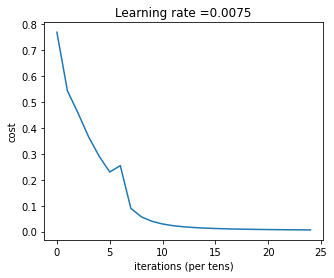

In [20]:
parameters = DNN_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

รูปที่ 2.22 ค่าของฟังก์ชันมูลค่าเทียบกับจำนวนรอบการฝึก

จากเอาต์พุตในรูปที่ 2.22 จะเห็นว่าค่าฟังก์ชันมูลค่ามีแนวโน้มลดลงตามจำนวนรอบการฝึก โดยลู่เข้าสู่ค่าประมาณ 0.02 

เขียนฟังก์ชัน <code>DNN_predict()</code> สำหรับพยากรณ์ 

In [21]:
def DNN_predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = DNN_fw(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [22]:
pred_train = DNN_predict(train_x, train_y, parameters)

Accuracy: 0.9952153110047844


In [23]:
pred_test = DNN_predict(test_x, test_y, parameters)

Accuracy: 0.76


เมื่อเปรียบเทียบความแม่นยำการพยากรณ์ภาพทดสอบกับโมเดลการถดถอยลอจิสติก (70%) จะเห็นว่าความแม่นยำสูงขึ้น 

ใช้ฟังก์ชัน <code>show_wrong_prediction()</code> เพื่อแสดงภาพที่โมเดลพยากรณ์ไม่ถูกต้อง

In [24]:
def show_wrong_prediction(classes, X, y, p):
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


In [26]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


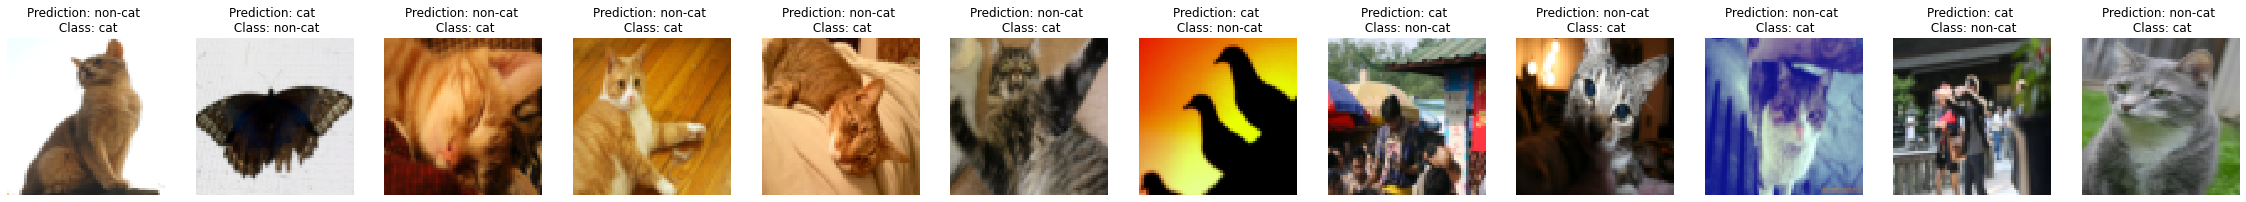

In [27]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

จะเห็นว่าภาพที่โมเดลพยากรณ์ผิดมักจะมีลักษณะเด่นที่สามารถสร้างความสับสนได้ เช่นสีของพื้นกับแมวมีความใกล้เคียงกัน อิริยาบทที่ผิดแปลกไป 
ความสว่างของภาพ หรือภาพที่มีรายละเอียดมาก 

เราสามารถทดลองใช้ภาพของตัวเองได้โดยใช้โค้ดในเซลล์ด้านล่างนี้ แก้ไขชื่อและไดเรคทอรีที่เก็บไฟล์และเลเบลให้สอดคล้องกับภาพ 
ผลจากการใช้ภาพของดอลล่าร์กับโมเดลนี้คือไม่สามารถพยากรณ์ได้ถูกต้องเหมือนเดิม

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


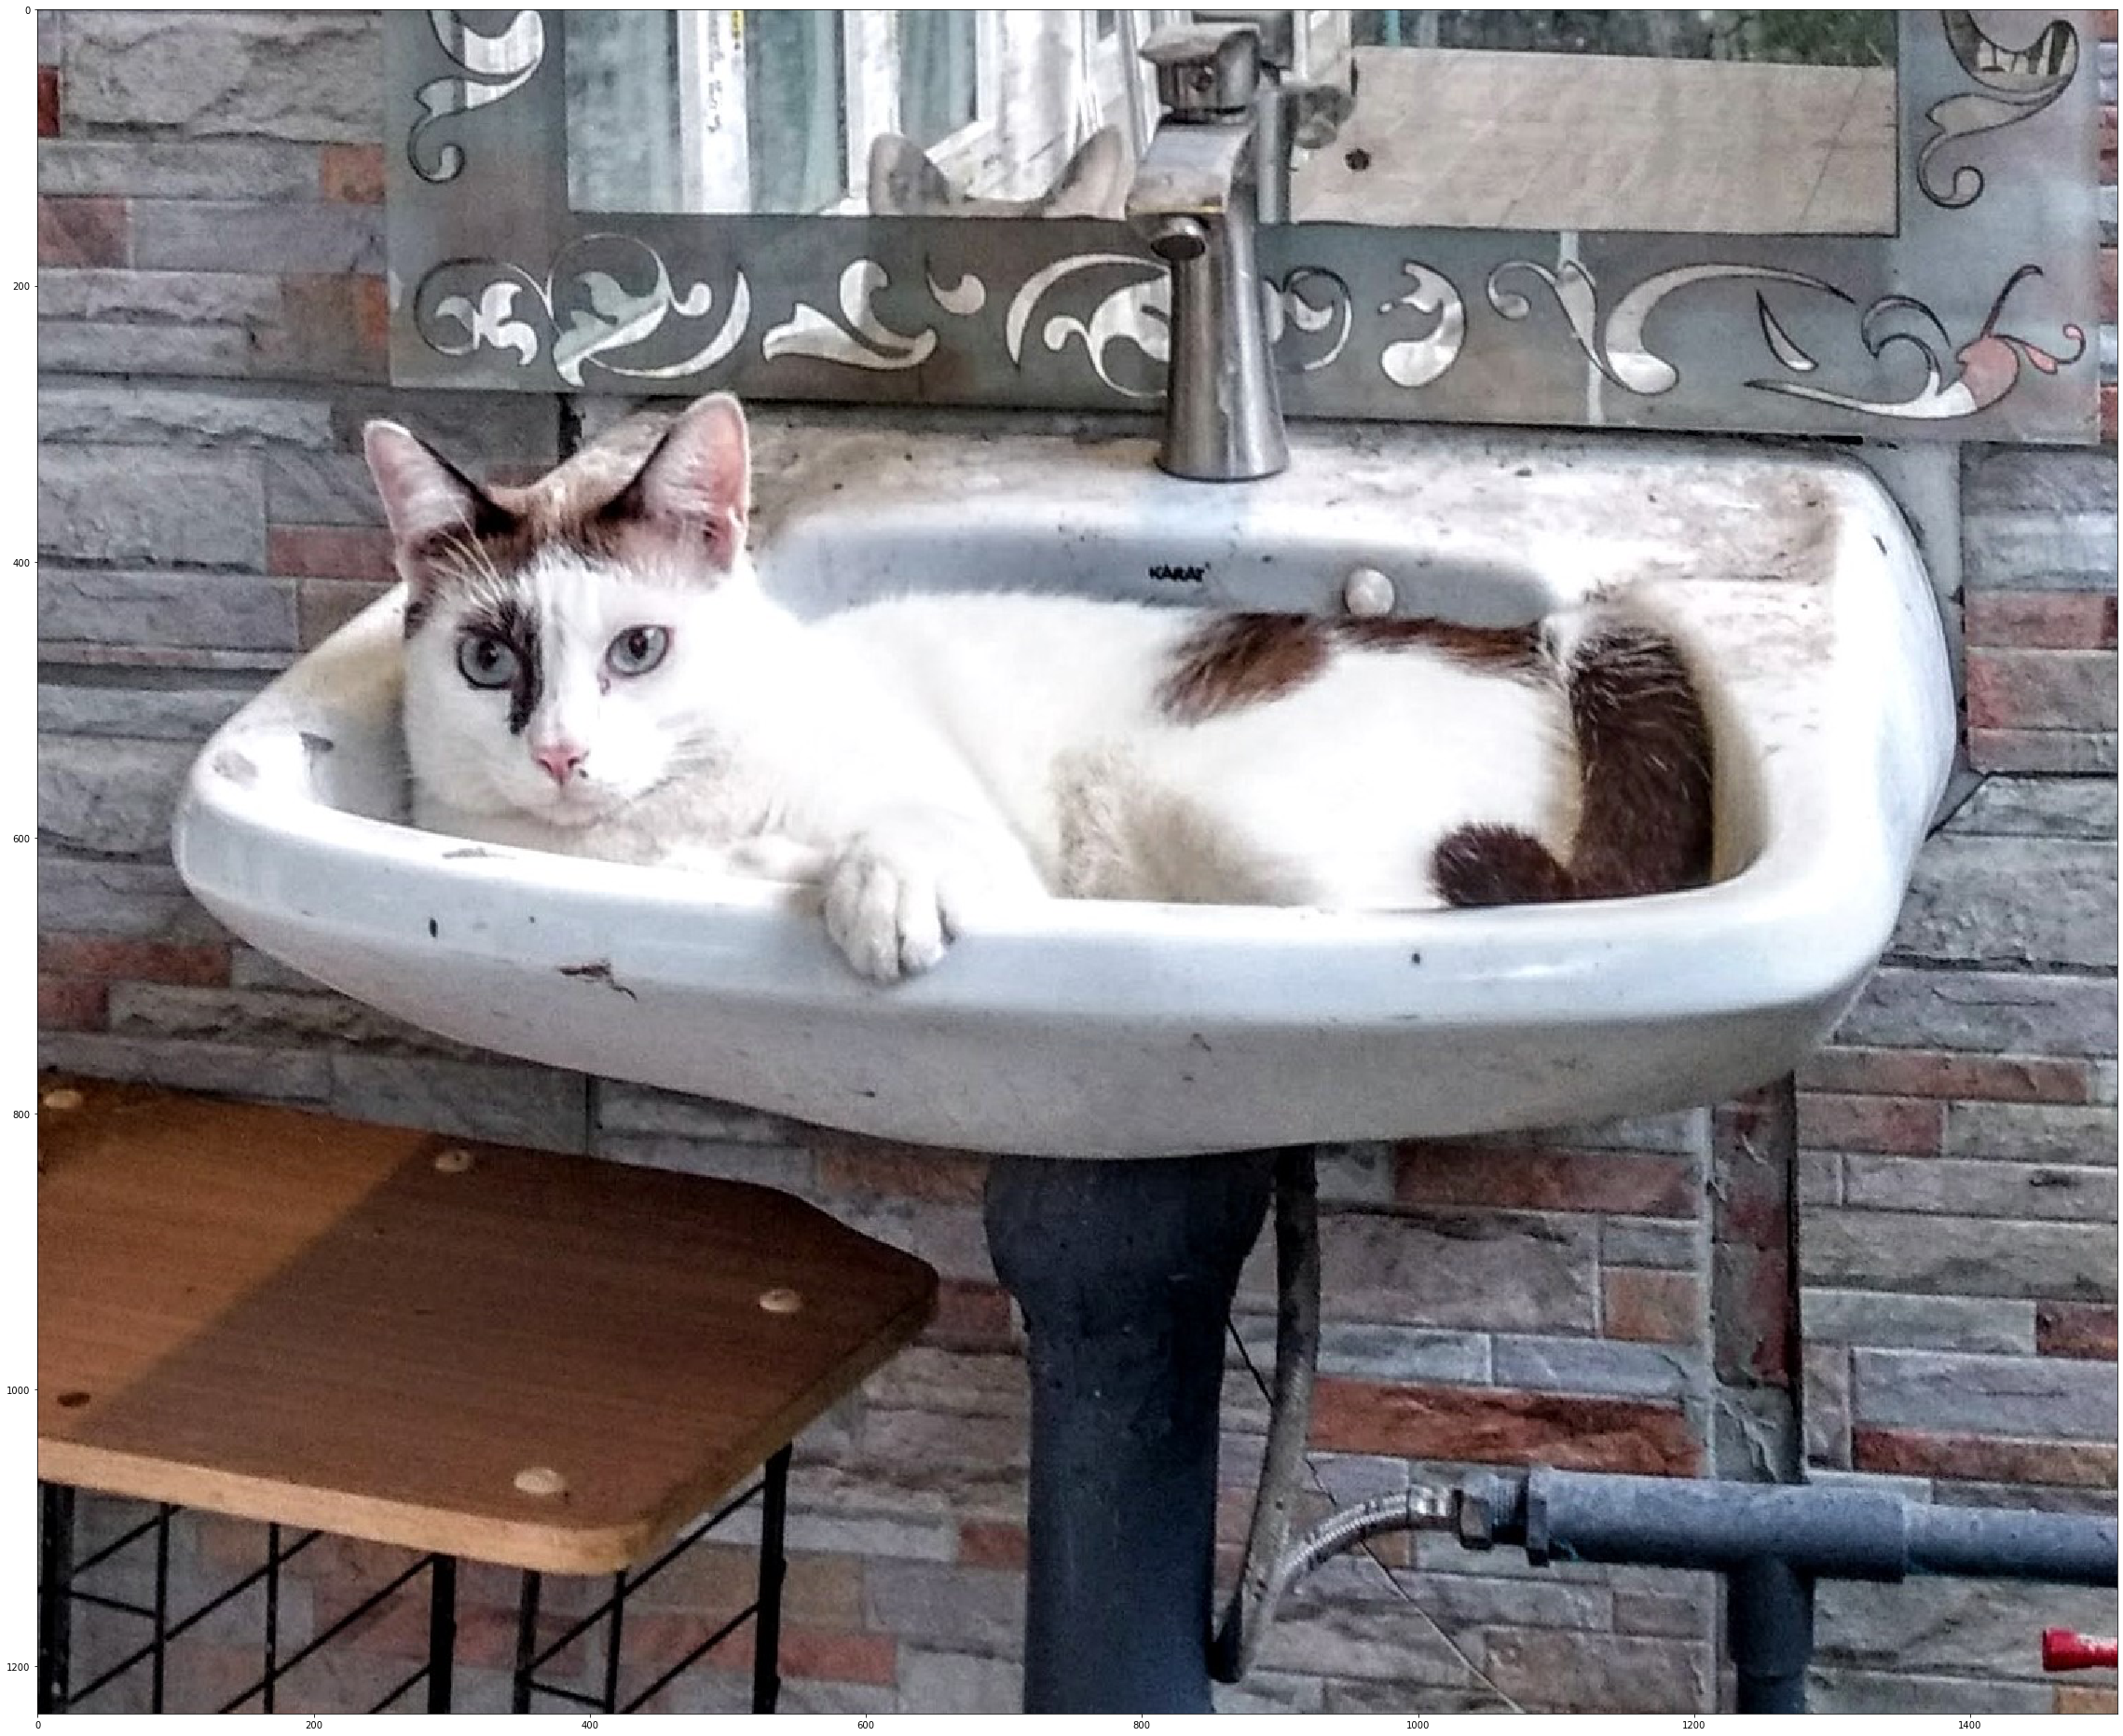

In [29]:
my_image = "logreg/images/dollar_sink.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
num_px = train_x_orig.shape[1]
image = np.array(plt.imread(my_image))
my_image = Image.fromarray(image).resize(size=(num_px,num_px))
plt.imshow(image)
my_image_array = np.array(my_image).reshape((num_px*num_px*3,1))/255.
my_predicted_image = DNN_predict(my_image_array, my_label_y, parameters)

#plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja 2022</div>